Suponga que se desea enviar valores de la hipotesis H a través de un canal  modelado como ruido discreto aditivo N, de modo que la señal discreta Y observada en el receptor tiene la forma Y = H + N. Suponga que H y N son variables aleatorias discretas independientes que toman valores cero y uno de forma equiprobable. Bajo esta situación se puede decir que va a ser probable observar tres valores de Y, esto es y =0, 1 o 2. 

Encontrar las probabilidades condicionales  $P_{Y/H}(y/0)$  y  $P_{Y/H}(y/1)  .$
Determinar cualitativamente el nivel de decisión óptimo a fijar en el receptor según el criterio ML.

Realizar una simulación Monte Carlo del problema para encontrar el valor de la probabilidad de error Pe para un nivel de decisión igual a 0, 1 y 2.

Ayuda:  Los valores de Y van a estar dados por las siguientes posibilidades:

+ H +	N =	Y
+ 0 +	0 =	 0
+ 0 +	1 =	 1
+ 1 +	0 =	 1
+ 1 +	1 =	 2

RESPUESTA: Pe = 0.25 para el caso en que el nivel de decisión sea 1.

Si H = {0,1} y N = {0,1}

+ $P_{Y/H}(0/0) = 0.5$
+ $P_{Y/H}(1/0) = 0.5$
+ $P_{Y/H}(2/0) = 0$
+ $P_{Y/H}(0/1) = 0$
+ $P_{Y/H}(1/1) = 0.5$
+ $P_{Y/H}(2/1) = 0.5$

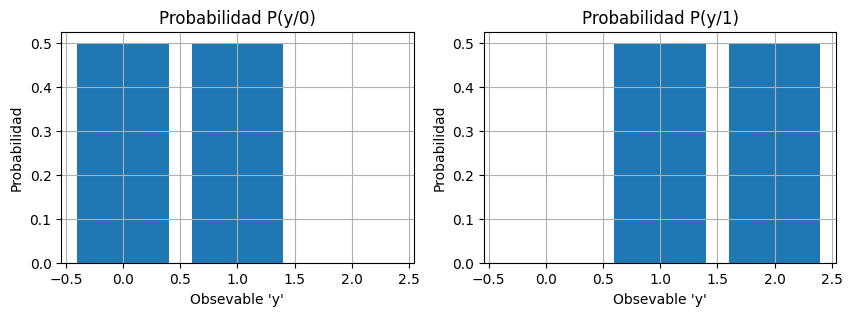

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.grid()
plt.xlabel("Obsevable 'y'")
plt.ylabel("Probabilidad")
plt.title("Probabilidad P(y/0)")
plt.bar([0,1,2],[.5,.5,0])

plt.subplot(1,2,2)
plt.grid()
plt.xlabel("Obsevable 'y'")
plt.ylabel("Probabilidad")
plt.title("Probabilidad P(y/1)")
plt.bar([0,1,2],[0,.5,.5])

plt.show()


### Ahora, superponiendo las probabilidades:

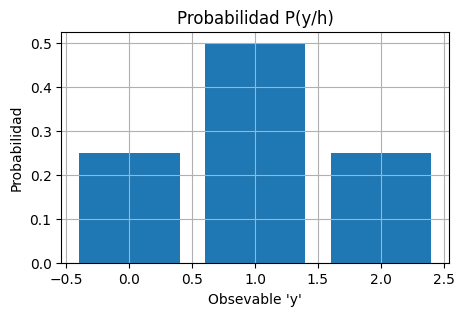

In [2]:
plt.figure(figsize=(5,3))
yP1 = [0.5,0.5,0];
yP2 = [0,0.5,0.5];
yPR = [(yP1[n]+yP2[n])/2 for n in range(len(yP1))]
plt.grid()
plt.xlabel("Obsevable 'y'")
plt.ylabel("Probabilidad")
plt.title("Probabilidad P(y/h)")
plt.bar([0,1,2],yPR,)

plt.show()

Se puede ver que el nivel de decisión debería ser 1. Ya que si $y<1 -> H = 0$ y si $y>1 -> H = 1$

La Probabilidad de Error (Pe) es: 0.241


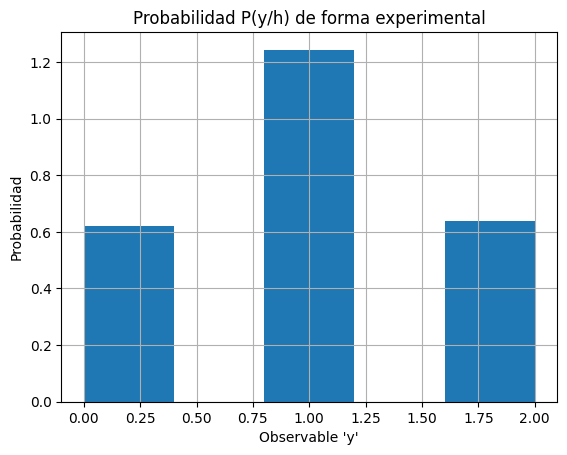

In [3]:
intentos = 10000

# Se crean las colecciones con valores aleatorios entre 0 y 1
H = np.random.randint(0,2,intentos)
N = np.random.randint(0,2,intentos)
decision = 1

# Ya que el ruido se suma al canal con valores discretos 0 ó 1, el observable
#y está entre 0 y 2
Y = [N[n]+H[n] for n in range(intentos)]

#Grafica
plt.hist(Y,density=True,bins = 5)
plt.grid()
plt.title("Probabilidad P(y/h) de forma experimental")
plt.xlabel("Observable 'y'")
plt.ylabel("Probabilidad")

# Se decodifican los datos de cada observación basados en lo que sabemos que puede
#enviar la fuente (0,1)
Resultados = []
for n in range(intentos):
    if(Y[n] < decision):
        Resultados.append(0);
    elif(Y[n] > decision):
        Resultados.append(1);
    else:
        x = np.random.randint(0,2);
        if(x == 0):
            Resultados.append(0);
        else:
            Resultados.append(1);

correctos = 0
# Se revisan todos los datos enviado por la fuente, y se contrastan con las decisiones tomadas
#para saber cuál es la cantidad de aciertos
for n in range(intentos):
    if(H[n] == Resultados[n]):
        correctos += 1

# Se calcula la propabilidad de aciertos, y luego la probabilidad de error
Pr = correctos/intentos;
Pe = 1-Pr;
print("La Probabilidad de Error (Pe) es:",Pe)
plt.show()
    

